In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(42)

In [2]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

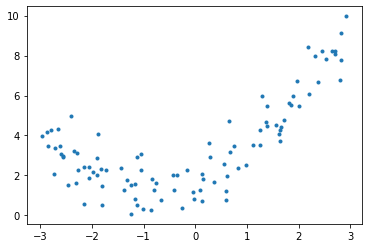

In [3]:
plt.figure()
plt.plot(x, y, '.')
plt.show()

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)

print("x[0] = {}, x[0]**2 = {}".format(x[0], x[0]**2))
print("x_poly[0] = {}".format(x_poly[0]))

x[0] = [-0.75275929], x[0]**2 = [0.56664654]
x_poly[0] = [-0.75275929  0.56664654]


In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_poly, y)
model.intercept_, model.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [6]:
def plot_model(model):
    x_test = np.linspace(-3, 3, 100).reshape(100, 1)
    x_test_poly = poly_features.transform(x_test)
    y_hat = model.predict(x_test_poly)
    plt.figure()
    plt.plot(x, y, '.')
    plt.plot(x_test, y_hat)
    plt.show()

In [7]:
# plot_model(model)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

polybig_features = PolynomialFeatures(degree=2, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()
polynomial_regression = Pipeline([
    ("poly_features", polybig_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
])
polynomial_regression.fit(x, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [9]:
def plot_poly_model(model):
    x_test = np.linspace(-3, 3, 100).reshape(100, 1)
    y_hat = model.predict(x_test)
    plt.figure()
    plt.plot(x, y, '.')
    plt.plot(x_test, y_hat)
    plt.axis([-3, 3, 0, 10])
    plt.show()

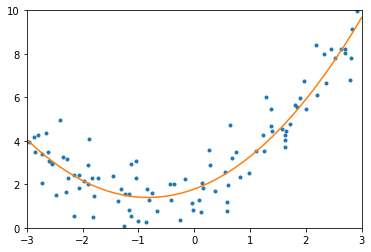

In [10]:
plot_poly_model(polynomial_regression)